In [1]:
import numpy as np
import xarray as xr
import os
import glob
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
outdir='/work/jet/data/interim/'

lon = -140
dlon = 40
west, east = lon-dlon, lon+dlon
reg = '%sEto%sW'%(str(abs(360+west)),str(abs(east))) if west<-180 else '%sWto%sW'%(str(abs(west)),str(abs(east)))

In [3]:
north_str = '30S'
dset = '_southof%s_SouthPacific_%s_swmt_decomposed_'%(north_str,reg)
lstr = 'sigma0'
dl = '005'

In [4]:
#mods = ['CM4_piControl_C','ESM4_piControl']
#mods = ['OM4p5_CORE', 'OM4p25_CORE', 'OM4p25_JRA55do1.4_0netfw_cycle6_extradiags_v3']
#mods = ['CM4_piControl_c192_OM4p125_v7', 'CM4_piControl_c192_OM4p125_v6_alt1', 'CM4_piControl_C']
#mods = ['CM4_piControl_c192_OM4p125_v7', 'CM4_piControl_c192_OM4p25_v8', 'CM4_piControl_C']
mods = ['CM4_historical_c192_OM4p25','CM4_historical_c192_OM4p125']

In [7]:
var_names = {'swmt':'so_*'+dset+'%s_%s'%(lstr,dl), 'pv':'pv', 'so':'so', 'sigma0':'pdens_sigma0'}
ddict = {mod:{} for mod in mods}

for mod in ddict:
    
    if mod in ['CM4_historical_c192_OM4p25','CM4_historical_c192_OM4p125',
               'CM4_piControl_c192_OM4p125_v7','CM4_piControl_c192_OM4p125_v6_alt1',
               'OM4p25_JRA55do1.4_0netfw_cycle6_extradiags_v3']:
        ti,tf = '1954','1959'
        tres = 'monthly_av'
        #tres = 'annual'
        
        if mod=='CM4_piControl_c192_OM4p125_v7':
            ti,tf = '0005','0060'
        elif mod=='CM4_piControl_c192_OM4p125_v6_alt1':
            ti,tf = '0005','0100'
            
    else:
        #ti,tf = '0001','0600'
        ti,tf = '1954','1959'
        tres = 'annual'
        
    for var in var_names:
        if var=='swmt':
            files = glob.glob(outdir+'%s_%s.nc'%(mod,var_names[var]))
            
            if len(files)>1:
                print('WARNING: More than one file for '+var+' in '+mod)
            elif len(files)==0:
                print('ERROR: No file available for '+var+' in '+mod,'%s_%s.nc'%(mod,var_names[var]))
                continue
            
            print('Loading '+os.path.basename(files[0]))
            ddict[mod][var] = xr.open_dataset(files[0])
            
        else:
            fname = '%s_%sto%s_%s_%s_zonal_mean_%s.nc'%(mod,ti,tf,tres,var_names[var],reg)
            print('Loading '+fname)
            ddict[mod][var] = xr.open_dataset(outdir+fname)[var]

ERROR: No file available for swmt in CM4_historical_c192_OM4p25 CM4_historical_c192_OM4p25_so_*_southof30S_SouthPacific_180Wto100W_swmt_decomposed_sigma0_005.nc
Loading CM4_historical_c192_OM4p25_1954to1959_monthly_av_pv_zonal_mean_180Wto100W.nc
Loading CM4_historical_c192_OM4p25_1954to1959_monthly_av_so_zonal_mean_180Wto100W.nc
Loading CM4_historical_c192_OM4p25_1954to1959_monthly_av_pdens_sigma0_zonal_mean_180Wto100W.nc
ERROR: No file available for swmt in CM4_historical_c192_OM4p125 CM4_historical_c192_OM4p125_so_*_southof30S_SouthPacific_180Wto100W_swmt_decomposed_sigma0_005.nc
Loading CM4_historical_c192_OM4p125_1954to1959_monthly_av_pv_zonal_mean_180Wto100W.nc
Loading CM4_historical_c192_OM4p125_1954to1959_monthly_av_so_zonal_mean_180Wto100W.nc
Loading CM4_historical_c192_OM4p125_1954to1959_monthly_av_pdens_sigma0_zonal_mean_180Wto100W.nc


In [9]:
colors = ["#ffffff","#66ff00","#66ff00","#66ff00","#66ff00","#66ff00","#99ff00","#99ff00","#99ff00","#99ff00","#99ff00",
          "#99ff00","#99ff00","#ccff00","#ccff00","#ccff00","#ccff00","#ffccff","#ffccff","#ff99ff","#ff99ff","#ff4cff",
          "#ff4cff","#ff4cff","#ff4cff","#ff4cff","#ff00ff","#ff00ff","#ff00ff"]
levels = [0,0.0001,1,2,3,4,5,6,7,8,9,10,15,20,30,40,50,60,70,80,90,100,120,140,160,180,200,300,400,2000]

In [10]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)

## piControl CM4X vs CM4.0

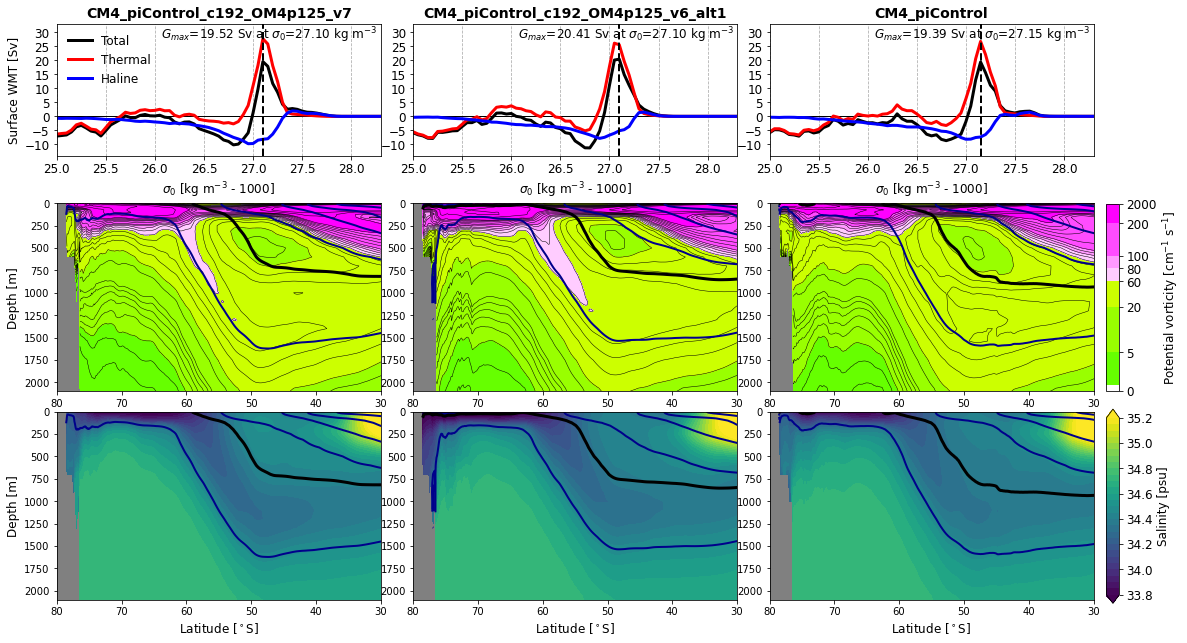

In [10]:
yr_st,yr_ed = '0051','0060'
#yr_st,yr_ed = '1988','2007'

fig = plt.figure(figsize=(18, 10))
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, hspace=0.2, wspace=0.1)

gs = gridspec.GridSpec(3, 3, height_ratios =[0.7, 1, 1], width_ratios =[1, 1, 1])

for i, mod in enumerate(ddict):
    for j, var in enumerate(list(var_names)[:-1]):
        ax = plt.subplot(gs[j,i]) if var=='swmt' else plt.subplot(gs[j,i],facecolor="gray")
        
        if var=='swmt':
            G = ddict[mod][var].sel(time=slice(yr_st,yr_ed)).mean('time')*1e-6
            sig_max = np.round(G.total[G.total.argmax()][lstr].values,2)
            G_max = np.round(G.total[G.total.argmax()].values,2)
            ax.axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
            ax.plot(G[lstr], G.total, color='k', linestyle='-', lw=3, label='Total')
            ax.plot(G[lstr], G.heat, color='r', linestyle='-', lw=3, label='Thermal')
            ax.plot(G[lstr], G.salt, color='b', linestyle='-', lw=3, label='Haline')
            ax.axvline(x=sig_max, c = 'k', ls='--', lw=2)
            ax.text(0.99, 0.99,r'$G_{max}$=%.2f Sv at $\sigma_%s$=%.2f kg m$^{-3}$'%(G_max,lstr[-1],sig_max), ha='right', va='top', fontsize=12,
                    transform=ax.transAxes)
            ax.set_ylim([-14,33])
            ax.set_yticks(np.arange(-10,35,5))
            ax.set_xlim([25,28.3])
            ax.set_xticks(np.arange(25,28.5,0.5))
            ax.grid(which='major', axis='x', linestyle='--')
            ax.tick_params(axis='both', which='major', labelsize=12)
            ax.set_title(mod, fontsize=14,fontweight='bold')
            ax.set_xlabel('$\sigma_%s$ [kg m$^{-3}$ - 1000]'%lstr[-1],fontsize=12)
            if i==0:
                ax.set_ylabel('Surface WMT [Sv]',fontsize=12)
                ax.legend(frameon=False, fancybox=False, loc='upper left', ncol=1, fontsize=12)
                
        elif var=='pv':
            pv = ddict[mod][var].sel(time=slice(yr_st,yr_ed)).mean('time')
            sigma0 = ddict[mod]['sigma0'].sel(time=slice(yr_st,yr_ed)).mean('time')
            G = ddict[mod]['swmt'].sel(time=slice(yr_st,yr_ed)).mean('time')*1e-6
            sig_max = np.round(G.total[G.total.argmax()][lstr].values,2)
            X = np.abs(((pv/100)*1.e14))
            p1 = ax.contourf(X.yq, X.z_l, X.values, levels=levels, colors=colors, extend='neither')
            ax.contour(X.yq, X.z_l, X.values, levels=levels, colors=['k'], linewidths=[0.5])
            ax.contour(sigma0.yh, sigma0.z_l, sigma0.values-1000, levels=np.arange(25,28.5,0.5), colors='darkblue', linewidths=2)
            cs = ax.contour(sigma0.yh, sigma0.z_l, sigma0.values-1000, levels=[sig_max], colors='k', linewidths=3)
            #ax.clabel(cs, cs.levels, inline=True, fmt='%1.2f', fontsize=10, manual=[(-50,550)])
            ax.set_ylim(2100, 0)
            ax.set_xlim(-80,-30)
            ax.set_xticks(np.arange(-80,-20,10))
            ax.set_xticklabels(np.arange(80,20,-10))
            if i==0:
                ax.set_ylabel('Depth [m]',fontsize=12)
                
            pos = ax.get_position()
            ax.set_position([pos.x0, pos.y0 - 0.019, pos.x1 - pos.x0, pos.y1 - pos.y0])
        elif var=='so':
            so = ddict[mod][var].sel(time=slice(yr_st,yr_ed)).mean('time')
            sigma0 = ddict[mod]['sigma0'].sel(time=slice(yr_st,yr_ed)).mean('time')
            G = ddict[mod]['swmt'].sel(time=slice(yr_st,yr_ed)).mean('time')*1e-6
            sig_max = np.round(G.total[G.total.argmax()][lstr].values,2)
            p2 = ax.contourf(so.yh, so.z_l, so.values, levels=np.arange(33.8,35.2,0.05), extend='both')
            ax.contour(sigma0.yh, sigma0.z_l, sigma0.values-1000, levels=np.arange(25,28.5,0.5), colors='darkblue', linewidths=2)
            cs = ax.contour(sigma0.yh, sigma0.z_l, sigma0.values-1000, levels=[sig_max], colors='k', linewidths=3)
            ax.set_ylim(2100, 0)
            ax.set_xlim(-80,-30)
            ax.set_xticks(np.arange(-80,-20,10))
            ax.set_xticklabels(np.arange(80,20,-10))
            ax.set_xlabel('Latitude [$^\circ$S]',fontsize=12)
            if i==0:
                ax.set_ylabel('Depth [m]',fontsize=12)
            
cax1 = fig.add_axes([0.91, 0.39, 0.01, 0.26])
cb1 = fig.colorbar(p1, cax=cax1, ticks=[0,5,20,60,80,100,200,2000], orientation='vertical', shrink=0.9, pad=0.02)
cb1.set_label('Potential vorticity [cm$^{-1}$ s$^{-1}$]',fontsize=12)
cb1.ax.tick_params(labelsize=12)

cax2 = fig.add_axes([0.91, 0.095, 0.01, 0.27])
cb2 = fig.colorbar(p2, cax=cax2, ticks=np.arange(33.8,35.2,0.2), orientation='vertical', shrink=0.9, pad=0.02)
cb2.set_label('Salinity [psu]',fontsize=12)
cb2.ax.tick_params(labelsize=12)

plt.savefig('/work/jet/figure.png', dpi=None, facecolor='w', edgecolor='w',
            orientation='portrait', format='png',transparent=False, bbox_inches='tight', pad_inches=0.1)
plt.show()

## CM4 vs ESM4

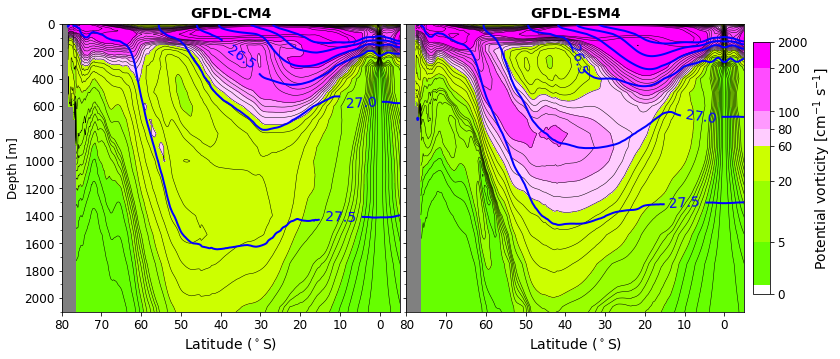

In [8]:
var='pv'

titlstr = ['GFDL-CM4','GFDL-ESM4']

fig, axs = plt.subplots(1, 2, sharey=True, figsize=(12,5))
fig.subplots_adjust(left=0.1, right=0.89, bottom=0.1, top=0.9, wspace=0.02)

for i, mod in enumerate(ddict):
    
    yr_st = '0101' if mod=='CM4_piControl' else '0001'
    yr_ed = '0600' if mod=='CM4_piControl' else '0500'
    
    pv = ddict[mod][var].sel(time=slice(yr_st,yr_ed)).mean('time')
    sigma0 = ddict[mod]['sigma0'].sel(time=slice(yr_st,yr_ed)).mean('time')
    X = np.abs(((pv/100)*1.e14))
    
    p = axs[i].contourf(X.yq, X.z_l, X.values, levels=levels, colors=colors, extend='neither')
    axs[i].contour(X.yq, X.z_l, X.values, levels=levels, colors=['k'], linewidths=[0.5])
    cs = axs[i].contour(sigma0.yh, sigma0.z_l, sigma0.values-1000, levels=np.arange(25,28.5,0.5), colors='b', linewidths=2)
    cl = axs[i].clabel(cs, cs.levels, inline=True, inline_spacing=-5, use_clabeltext=True, fmt='%1.1f', 
                       fontsize=14, manual=[(-10,1300),(-5,800),(-35,250)])
    
    if mod =='CM4_piControl':
        for label in cl:
            if label.get_text() == '26.5':
                label.set_rotation(-35)
    
    axs[i].set_ylim(2100, 0)
    #axs[i].set_yticks(np.arange(0,2200,100),minor=True)
    axs[i].yaxis.set_major_locator(MultipleLocator(200))
    axs[i].yaxis.set_major_formatter(FormatStrFormatter('%d'))
    axs[i].yaxis.set_minor_locator(MultipleLocator(100))

    if i==0:
        axs[i].set_ylabel('Depth [m]',fontsize=12)
        
    axs[i].set_xlim(-80,5)
    axs[i].set_xticks(np.arange(-80,10,10))
    axs[i].set_xticklabels(np.arange(80,-10,-10))
    axs[i].set_xlabel('Latitude ($^\circ$S)',fontsize=14)
    axs[i].tick_params(axis='both', which='both', labelsize=12)
    axs[i].set_facecolor('gray')
    
        
    axs[i].set_title(titlstr[i], fontsize=14,fontweight='bold')

cax = fig.add_axes([0.9, 0.15, 0.02, 0.70])
cb = fig.colorbar(p, cax=cax, ticks=[0,5,20,60,80,100,200,2000], orientation='vertical', shrink=0.9, pad=0.03)
cb.set_label('Potential vorticity [cm$^{-1}$ s$^{-1}$]',fontsize=14)
cb.ax.tick_params(labelsize=12)

plt.savefig('/work/jet/figure.png', dpi=300, facecolor='w', edgecolor='w',
            orientation='portrait', format='png',transparent=False, bbox_inches='tight', pad_inches=0.1)
plt.show()

## Historical p25 vs p125

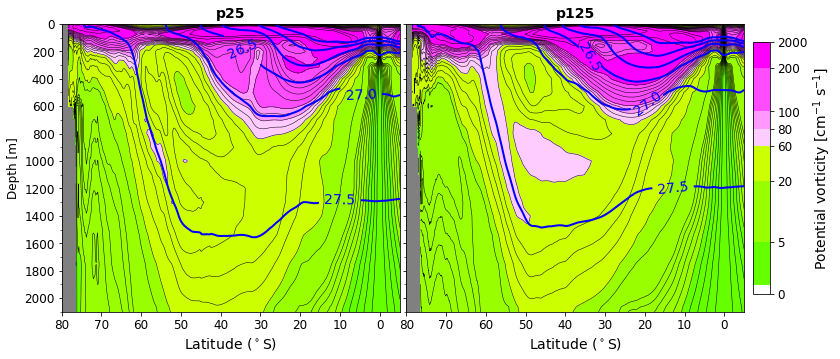

In [11]:
var='pv'

titlstr = ['p25','p125']
yr_st,yr_ed = '1950','1959'
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(12,5))
fig.subplots_adjust(left=0.1, right=0.89, bottom=0.1, top=0.9, wspace=0.02)

for i, mod in enumerate(ddict):
  
    pv = ddict[mod][var].sel(time=slice(yr_st,yr_ed)).mean('time')
    sigma0 = ddict[mod]['sigma0'].sel(time=slice(yr_st,yr_ed)).mean('time')
    X = np.abs(((pv/100)*1.e14))
    
    p = axs[i].contourf(X.yq, X.z_l, X.values, levels=levels, colors=colors, extend='neither')
    axs[i].contour(X.yq, X.z_l, X.values, levels=levels, colors=['k'], linewidths=[0.5])
    cs = axs[i].contour(sigma0.yh, sigma0.z_l, sigma0.values-1000, levels=np.arange(25,28.5,0.5), colors='b', linewidths=2)
    cl = axs[i].clabel(cs, cs.levels, inline=True, inline_spacing=-5, use_clabeltext=True, fmt='%1.1f', 
                       fontsize=14, manual=[(-10,1300),(-5,800),(-35,250)])
    
    axs[i].set_ylim(2100, 0)
    #axs[i].set_yticks(np.arange(0,2200,100),minor=True)
    axs[i].yaxis.set_major_locator(MultipleLocator(200))
    axs[i].yaxis.set_major_formatter(FormatStrFormatter('%d'))
    axs[i].yaxis.set_minor_locator(MultipleLocator(100))

    if i==0:
        axs[i].set_ylabel('Depth [m]',fontsize=12)
        
    axs[i].set_xlim(-80,5)
    axs[i].set_xticks(np.arange(-80,10,10))
    axs[i].set_xticklabels(np.arange(80,-10,-10))
    axs[i].set_xlabel('Latitude ($^\circ$S)',fontsize=14)
    axs[i].tick_params(axis='both', which='both', labelsize=12)
    axs[i].set_facecolor('gray')
    
        
    axs[i].set_title(titlstr[i], fontsize=14,fontweight='bold')

cax = fig.add_axes([0.9, 0.15, 0.02, 0.70])
cb = fig.colorbar(p, cax=cax, ticks=[0,5,20,60,80,100,200,2000], orientation='vertical', shrink=0.9, pad=0.03)
cb.set_label('Potential vorticity [cm$^{-1}$ s$^{-1}$]',fontsize=14)
cb.ax.tick_params(labelsize=12)

#plt.savefig('/work/jet/figure.png', dpi=300, facecolor='w', edgecolor='w',
#            orientation='portrait', format='png',transparent=False, bbox_inches='tight', pad_inches=0.1)
plt.show()

## Minimum PV time series

In [92]:
mod = 'ESM4_piControl' #CM4_piControl, ESM4_piControl
sigma0 = ddict[mod]['sigma0']#.sel(time=slice(yr_st,yr_ed)).mean('time')
pv = ddict[mod]['pv']#.sel(time=slice(yr_st,yr_ed)).mean('time')
X = xr.DataArray(np.abs(((pv/100)*1.e14)).values,coords=[pv.time,pv.z_l.values,sigma0.yh.values],dims=['time','z_l','yh'])
#X = X.where((sigma0<1027.5)&(sigma0>1027.0)).sel(yh=slice(-70,-30),z_l=slice(100,None)) # CM4_piControl
X = X.where((sigma0<1027.0)&(sigma0>1026.5)).sel(yh=slice(-70,-30),z_l=slice(100,None)) # ESM4_piControl

In [93]:
y_min_idx = X.sel(time=slice(yr_st,yr_ed)).mean('time').argmin(dim=['z_l', 'yh'])['yh']
z_min_idx = X.sel(time=slice(yr_st,yr_ed)).mean('time').argmin(dim=['z_l', 'yh'])['z_l']

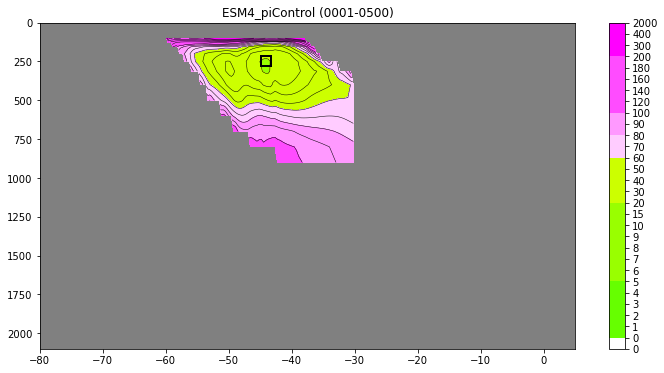

In [94]:
fig = plt.figure(figsize=(12,6))
ax = plt.subplot(1,1,1,facecolor="gray")
cs = ax.contourf(X.yh, X.z_l, X.sel(time=slice(yr_st,yr_ed)).mean('time').values, levels=levels, colors=colors, extend="neither")
ax.contour(X.yh, X.z_l, X.sel(time=slice(yr_st,yr_ed)).mean('time').values, levels=levels, colors=["k"], linewidths=[0.5])
plt.colorbar(cs, ticks=levels)
ax.set_ylim(2100, 0)
ax.set_xlim(-80,5)
ax.plot(X.yh[y_min_idx],X.z_l[z_min_idx],marker='s',c='k',ms=10,mew=2,mfc='none')
ax.set_title(mod+' (%s-%s)'%(yr_st,yr_ed))
plt.show()

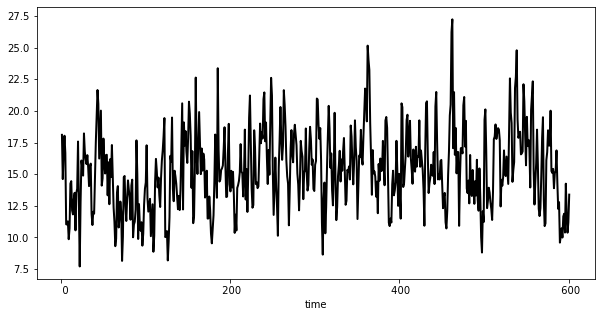

In [95]:
fig, ax = plt.subplots(figsize=(10,5))
X.min(dim=['z_l', 'yh']).plot(ax=ax,lw=2,c='k')
plt.show()

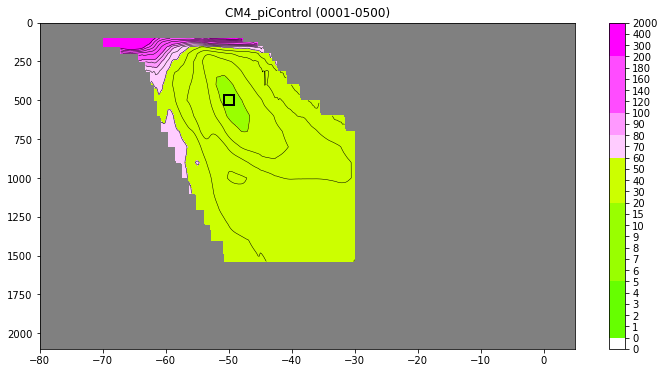

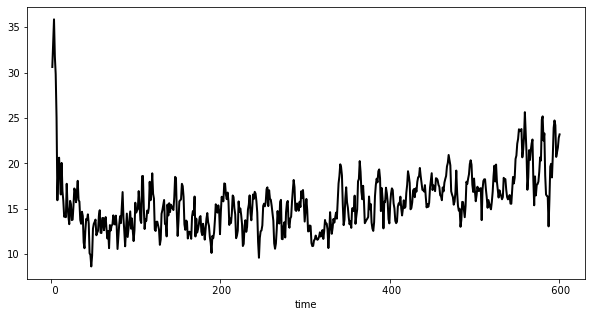

In [91]:
fig, ax = plt.subplots(figsize=(10,5))
X.min(dim=['z_l', 'yh']).plot(ax=ax,lw=2,c='k')
plt.show()